# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning frameworks (e.g. PyTorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known frameworks for deep learning tasks.  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [ ]:
import sys
print(sys.executable)

#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import torch.optim as optim

In [2]:
# Transformation pipeline: image to tensor and normalize to equal range scale [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Map-style dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Map-style dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
'''
    Class mapping as follows:
    0: plane
    1: car
    2: bird
    3: cat
    4: deer
    5: dog
    6: frog
    7: horse
    8: ship
    9: truck
'''

Files already downloaded and verified


'\n    Class mapping as follows:\n    0: plane\n    1: car\n    2: bird\n    3: cat\n    4: deer\n    5: dog\n    6: frog\n    7: horse\n    8: ship\n    9: truck\n'

####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

In [34]:
# Show normalized image in original form
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Plot given data and specs
def plot_data(x, y, xlabel, ylabel, title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)
    plt.show()

Class 1: plane


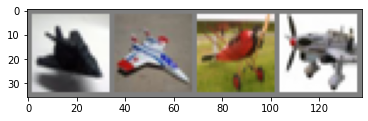

Class 2: car


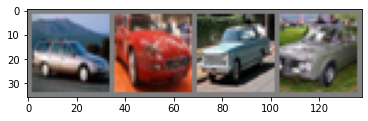

Class 3: bird


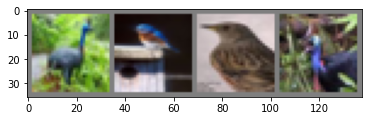

Class 4: cat


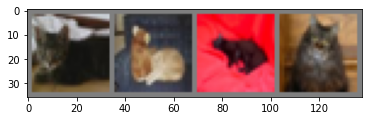

Class 5: deer


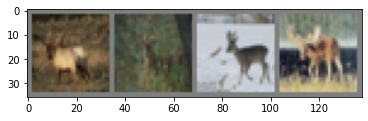

Class 6: dog


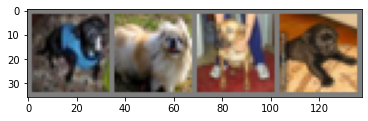

Class 7: frog


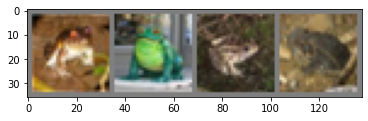

Class 8: horse


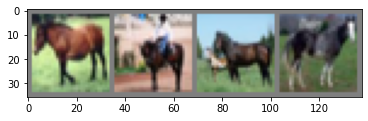

Class 9: ship


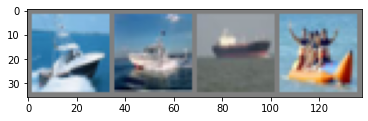

Class 10: truck


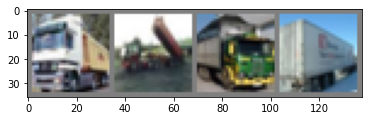

In [4]:
# To save example images per class
example_images = [[],[],[],[],[],[],[],[],[],[]]
# Max images to show per class
max_images = 4
# Whether saving max images to show is fullfilled per class
image_class_completed = np.full(len(example_images), False)

# Loop through trainingset
for (idx, batch) in enumerate(trainset):
    img = batch[0]
    label = batch[1]
            
    num_images_class = len(example_images[label])
    
    # When more images for this class are still required save image   
    if num_images_class < max_images: 
        example_images[label].append(img)
    # When enough (i.e. max) images to show
    elif num_images_class == max_images:
        image_class_completed[label] = True
        
    # When having enough images for all classes to show
    if np.all(image_class_completed == True):
        break

# Show images per class
for (i, class_images) in enumerate(example_images):
    print(f"Class {i + 1}: {classes[i]}")
    imshow(torchvision.utils.make_grid(class_images))

In [5]:
# imshow(list(example_images))

# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# # show images
# imshow(torchvision.utils.make_grid(images))

# # print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

#### Two Layer Neural Network

In [11]:
class TwoLayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: decide by yourself e.g. 1024, 512, 128 ...
        :param num_classes: 
        '''
        self.input_size = input_size # Num neurons input layer
        self.hidden_size = hidden_size # Num neurons hidden layer
        self.num_classes = num_classes # Num neurons output layer
        
        # Construct neural network
        super(TwoLayerNet, self).__init__()
        # First fully connected layer
        self.fc1 = torch.nn.Linear(input_size, hidden_size)        
        # Second fully connected layer
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    # Forward function passing data through the network from input, hidden layers between, to output    
    def forward(self,x):
        # Flatten x
        x = x.view(x.shape[0], -1)
        # Pass data to fc1
        # Use the rectified-linear (ReLu) activation function in the first hidden layer (fc1)
        # Pass the result through fc2
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

#### Convolutional Neural Network

In [12]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self, input_channels=3, num_classes=10):
        super(ConvNet, self).__init__()
        self.c1 = nn.Conv2d(input_channels, 6, 5) # The first convolutional layer
        self.s2 = nn.AvgPool2d(2, stride=2) # A subsampling/pooling layer 
        self.c3 = nn.Conv2d(6, 16, 5) # The second convolutional layer 
        self.s4 = nn.AvgPool2d(2, stride=2) # The second pooling layer
        self.c5 = nn.Linear(16*5*5, 120) # The last convolutional layer 
        self.f6 = nn.Linear(120, 84) # The first fully-connected layer
        self.output = nn.Linear(84, num_classes) # The last dense layer
        
    # Forward data x through CNN
    def forward(self, x):
        x = torch.tanh(self.c1(x))
        x = self.s2(x)
        x = torch.tanh(self.c3(x))
        x = self.s4(x)
        x = x.view(-1, self.num_flat_features(x))
        x = torch.tanh(self.c5(x))
        x = torch.tanh(self.f6(x))
        x = torch.sigmoid(self.output(x))
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        # torch.Size([16, 5, 5])
        for s in size:
            num_features *= s
        return num_features    

In [14]:
# Given a batch of class indices, convert them to their corresponding activation a
def classes_to_a(classes_batch):
    a_batch = []
    # For each output class in the batch generate desired activation a
    for class_i in classes_batch:
        a = np.zeros(10)
        a[class_i] = 1
        a_batch.append(a)
    return a_batch

# Given a batch of activations a, convert them to their corresponding class index
def a_to_classes(a_batch):
    y_class_i = []
    # For each activation a in the batch generate corresponding class index
    for a in a_batch:
        y_class_i.append(int(torch.argmax(a)))
    return y_class_i

# Print class names of labels given a list with class indices
def labels_to_classes(labels):
    return ' '.join('%5s' % classes[labels[j]] for j in range(len(labels)))

# Convert list to tensor
def list_to_tensor(lst):
    return torch.FloatTensor(np.array(lst))

# Returns accuracy in terms of fraction, i.e. fraction that corresponds
def accuracy(outputs, labels):
    return np.sum(np.array(outputs) == np.array(labels))/float(len(labels))

def train(net, criterion, optimizer, trainloader, epoch=1):
    print(f"Training on model of type {type(net)} using {epoch} epochs.")
    
    loss_per_epoch = []
    
    net.train()
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 
        
        running_loss = 0
        
        for x, y in trainloader:

            optimizer.zero_grad()
          
            y_pred = net(x)

            # According to the loss function's definition a specific input/target combination is expected
            if isinstance(net, ConvNet):
                # CNN uses Cross-Entropy loss function
                loss = criterion(y_pred, y)
            # Default ordinary Two Layer Neural network
            else:
                # TwoLayerNet uses MSE loss function
                loss = criterion(y_pred, list_to_tensor(classes_to_a(y)))
                
            running_loss += loss.item() * x.size(0)
            
            loss.backward()
            optimizer.step()
            
        epoch_loss = running_loss / len(trainloader.dataset)
        loss_per_epoch.append(epoch_loss)
        
    print('Finished Training')
    
    return loss_per_epoch

####  Train Two-layer Net

In [51]:
# PARAMETERS
hidden_size = 512
epochs = 10
lr = 0.001

In [52]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Batch size
N = len(images)

# Input dimension (i.e. num neurons in input layer)
input_size = np.prod(list(example_images[0][0].shape))

# Output dimension (i.e. num neurons in output layer).
num_classes = len(classes)

print(f"batch_size = {N}, input_size = {input_size}, hidden_size = {hidden_size}, num_classes = {num_classes}")
    
# Construct our two layer neural network model
two_layer_net = TwoLayerNet(input_size, hidden_size, num_classes)

# Define our cost function and an optimizer. 
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr)

# Train our model
losses1 = train(two_layer_net, criterion, optimizer, trainloader, epochs)

batch_size = 4, input_size = 3072, hidden_size = 512, num_classes = 10
Training on model of type <class '__main__.TwoLayerNet'> using 10 epochs.
Finished Training


[3.0319024710655214, 2.8086300624084473, 2.727159482717514, 2.6562703722667695, 2.600376243815422, 2.5490147086286545, 2.496690517525673, 2.44880179438591, 2.4005716324591635, 2.358596719386578]


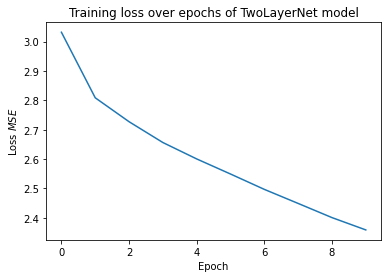

In [104]:
# Visualize learning process
x = np.arange(len(losses1))
print(losses1)
plot_data(x, losses1, "Epoch", "Loss $MSE$", "Training loss over epochs of TwoLayerNet model")

#### Train ConvNet - LeNet-5

In [105]:
# PARAMETERS
epochs = 10
lr = 0.01

In [106]:
# Contstruct our LeNet-5 CNN
conv_net = ConvNet()

# Define our cost function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net.parameters(), lr)

# Train our model
losses2 = train(conv_net, criterion, optimizer, trainloader, epochs)

Training on model of type <class '__main__.ConvNet'> using 10 epochs.
Finished Training


[2.1285986302757265, 2.0467821693229675, 1.9947181737613677, 1.9485451333999633, 1.9102567186927795, 1.8896870883083343, 1.8744637716770172, 1.8628158718299865, 1.8522797382736207, 1.843827926416397]


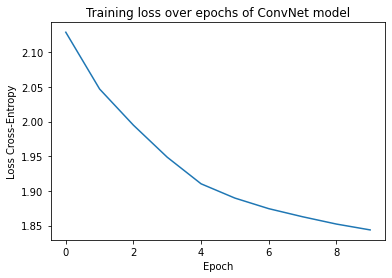

In [107]:
# Visualize learning process
x = np.arange(len(losses2))
print(losses2)
plot_data(x, losses2, "Epoch", "Loss Cross-Entropy", "Training loss over epochs of ConvNet model")

In [24]:
def valid(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [25]:
def valid_class(net,testloader,classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [145]:
###  suggested reference: https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image
from torch.utils.data import Dataset, DataLoader
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dct = pickle.load(fo, encoding='bytes')
    return dct

class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        self.root = root        
        self.train = train
        self.transform = transform
        
        self.x = list() # Input (i.e. image)
        self.y = list() # Output (i.e. label)
        
        # When loader for training data set is asked for
        if train:
            # For all batches load them in
            for ext in range(1, 6):
                path = f"{root}/data_batch_{ext}"
                dct = unpickle(path)
                    
                for input_image in dct[b"data"]:
                    self.x.append(input_image.reshape(3,32,32))
                    
                self.y = [*self.y, dct[b"labels"]]
                
            self.x = np.array(self.x)
            self.y = np.array(self.y)
            self.y = np.reshape(self.y, (1,-1))
        # When loader for test data set is aked for
        else:
            path = f"{root}/test_batch"
            dct = unpickle(path)
            self.x = dct[b"data"]
            self.y = dct[b"labels"]
            self.x = np.reshape(self.x, (-1,3,32,32))
            self.y = np.array(self.y)
            self.y = np.reshape(self.y, (1,-1))        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        img = self.x[item]
        y = self.y[0,item]
        return torch.FloatTensor(np.array(img, y))

transform_train = transforms.Compose([transforms.Resize((32, 32)), # To make sure of proper size
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # To speed up learning process

cif10 = CIFAR10_loader(root='./data/cifar-10-batches-py', transform = transform_train, train = True)

#### *` Complement Transform function and Optimizer`*

In [ ]:
transform_train = transforms.Compose([transforms.Resize((32, 32)), # To make sure of proper size
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # To speed up learning process

transform_test = transforms.Compose([transforms.Resize((32, 32)),
                                    transforms.ToTensor()]
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)))

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [ ]:
def train(net, trainloader,epoch=1):
    ###################### Define Loss function and optimizer
    
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 

        ################################
        # Todo: finish the code
        ################################

    print('Finished Training')

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [ ]:
################################
# Todo: finish the code
################################

#### *` test the accuracy of ConvNet `*

In [26]:
valid(conv_net, testloader)

Accuracy of the network on the 10000 test images: 48 %


#### *`test the accuracy of TwolayerNet`*

In [47]:
valid(two_layer_net, testloader)

Accuracy of the network on the 10000 test images: 50 %


## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 , which
contains the images of 10 different object categories. The dataset we use throughout the assignment is a subset of STL-10 
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [ ]:
from stl10_data import *
class STL10_Dataset(Dataset):
    def __init__(self,root,train=True,transform = None):
        ################################
        # Todo: finish the code
        ################################

 

    def __len__(self):
        ################################
        # Todo: finish the code
        ################################

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################

        return img, target


#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [ ]:
################################
# Todo: finish the code
################################

###  `Bonus`

In [ ]:
pass